In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df = df.dropna()


In [4]:
df.head()
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


In [5]:
print(df['species'].value_counts())

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


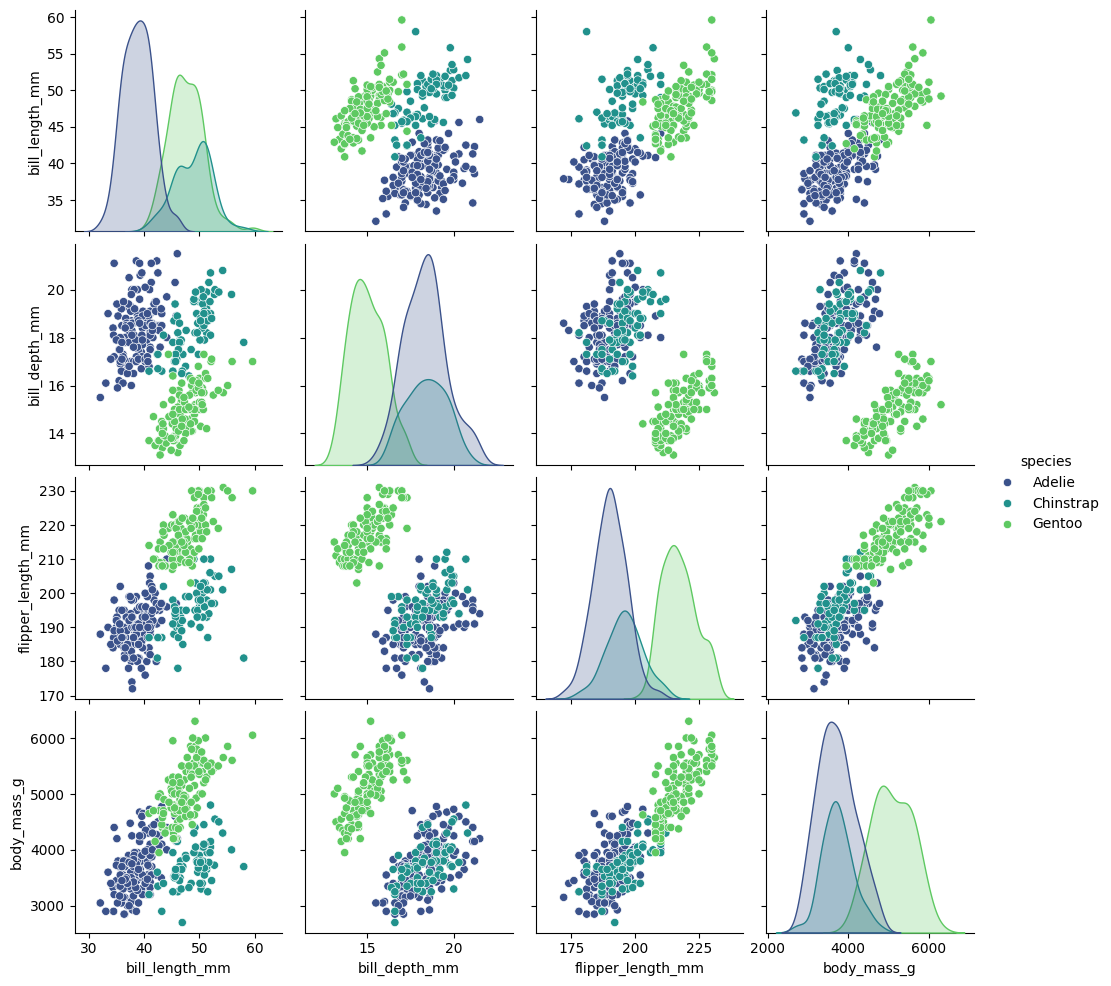

In [6]:
sns.pairplot(df, hue='species', palette='viridis')
plt.show()

In [7]:
X = df['flipper_length_mm']
y = df['body_mass_g']

In [8]:
X = sm.add_constant(X)

In [9]:
modelo_reg = sm.OLS(y, X).fit()

In [10]:
print(modelo_reg.summary2())

                      Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.761     
Dependent Variable:     body_mass_g        AIC:                  4926.1457 
Date:                   2026-02-16 09:01   BIC:                  4933.7620 
No. Observations:       333                Log-Likelihood:       -2461.1   
Df Model:               1                  F-statistic:          1060.     
Df Residuals:           331                Prob (F-statistic):   3.13e-105 
R-squared:              0.762              Scale:                1.5472e+05
---------------------------------------------------------------------------
                    Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
---------------------------------------------------------------------------
const             -5872.0927 310.2852 -18.9248 0.0000 -6482.4722 -5261.7131
flipper_length_mm    50.1533   1.5402  32.5622 0.0000    47.1234    53.1831
----------------------------------

In [11]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [12]:
X_clf = df[features]
y_clf = df['species']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.4, stratify=y_clf, random_state=42)

In [14]:
clf = DecisionTreeClassifier(max_depth=3, random_state=112)
clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",112
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [15]:
y_pred = clf.predict(X_test)
print(f"Precisión del modelo: {metrics.accuracy_score(y_test, y_pred):.2f}")

Precisión del modelo: 0.94


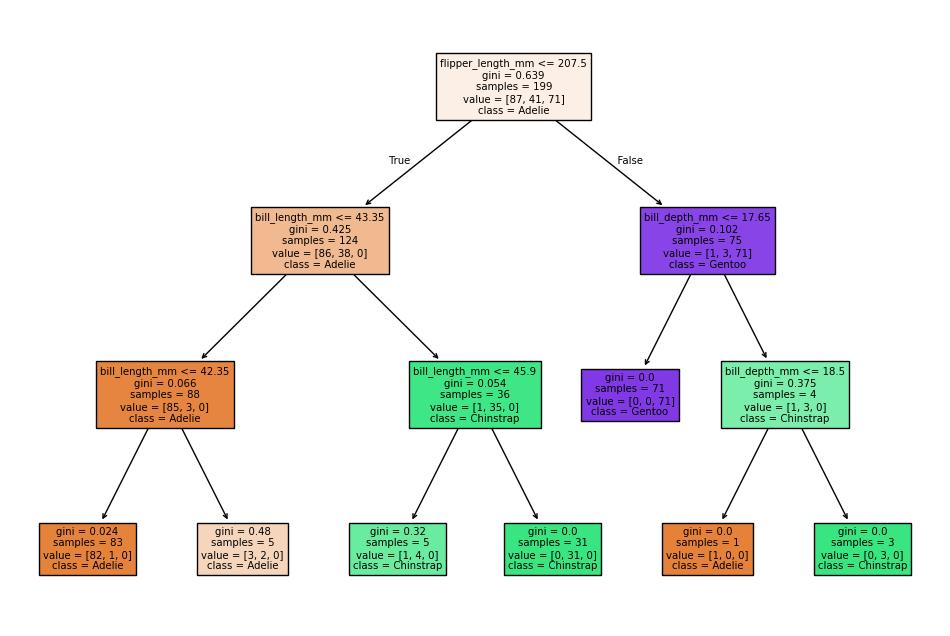

In [16]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=features, class_names=clf.classes_, filled=True)
plt.show()

In [17]:
X_k = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_k)

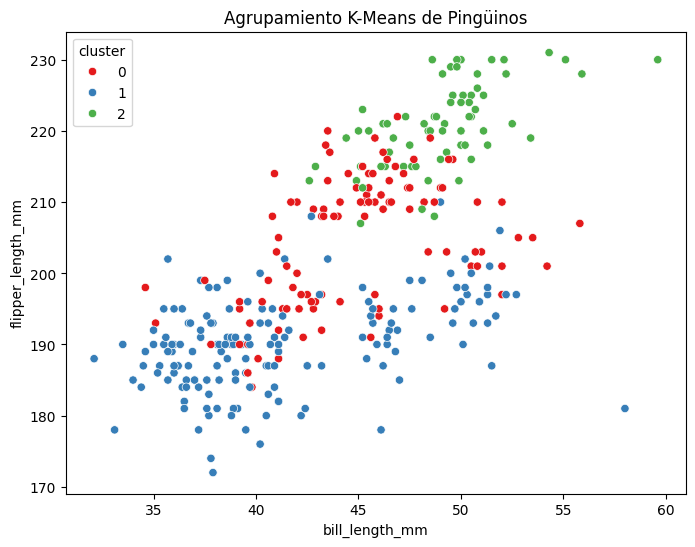

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='bill_length_mm', y='flipper_length_mm', hue='cluster', palette='Set1')
plt.title('Agrupamiento K-Means de Pingüinos')
plt.show()